# Note
1. Melakukan percobaan build_models v4.0
2. Dilakukan pada hari Rabu, 17 Juli 2024
3. Tempat di Kost
4. Data menggunakan Dataset yang dari Roboflow 
4. Meliputi Class: 20 Kelas Aksara Jawa:
- Ba, Ca, Da, Dha, Ga, Ha, Ja, Ka, La, Ma, 
- Na, Nga, Nya, Pa, Ra, Sa, Ta, Tha, Wa, Ya

# Setup Environment 

In [31]:
# pip install tensorflow

In [32]:
# pip install keras

In [33]:
# pip install opencv-python

In [34]:
# pip install imutils

In [35]:
# pip install matplotlib

In [36]:
# pip install seaborn

In [37]:
# pip install scikit-learn

# Import Library

In [28]:
import pandas as pd
import matplotlib.pyplot as plt  
import os
from os.path import join
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization , Activation,Conv2D
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix 

# Preprocessing

In [29]:
# import os
# import pandas as pd
# import cv2

# def convert_to_png(image_path, output_path):
#     # Read the image using OpenCV
#     image = cv2.imread(image_path)
#     # Create the output directory if it doesn't exist
#     os.makedirs(os.path.dirname(output_path), exist_ok=True)
#     # Save the image as PNG
#     cv2.imwrite(output_path, image)

# def get_last_n_parts(path, n):
#     return os.path.join(*path.split(os.sep)[-n:])

# def create_labels_csv(DATASET_PATH, OUTPUT_CSV, OUTPUT_IMAGE_DIR):
#     # List to store image file paths and their corresponding labels and dimensions
#     data = []

#     # Traverse the dataset directory
#     for root, dirs, files in os.walk(DATASET_PATH):
#         for file in files:
#             if file.endswith(('.jpg', '.jpeg', '.png')):
#                 # Get the class label from the subdirectory name
#                 label = os.path.basename(root)
#                 # Get the full file path
#                 file_path = os.path.join(root, file)
                
#                 # Create a new file path for the PNG image
#                 relative_path = os.path.relpath(file_path, DATASET_PATH)
#                 png_file_path = os.path.join(OUTPUT_IMAGE_DIR, os.path.splitext(relative_path)[0] + '.png')
                
#                 # Convert the image to PNG
#                 convert_to_png(file_path, png_file_path)
                
#                 # Get image dimensions
#                 img = cv2.imread(file_path)
#                 height, width, _ = img.shape
                
#                 # Get only the last 3 parts of the path for CSV
#                 csv_path = get_last_n_parts(png_file_path, 2)
                
#                 # Append to the data list including dimensions
#                 data.append([csv_path, width, height, label])
    
#     # Create a DataFrame from the data list
#     df = pd.DataFrame(data, columns=['file_path', 'width', 'height', 'label'])
    
#     # Save the DataFrame to a CSV file
#     df.to_csv(OUTPUT_CSV, index=False)
#     print(f'Labels CSV file created at: {OUTPUT_CSV}')

# # Define the paths for the two datasets and their respective output directories
# DATASET_PATH = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_original\\CustomData\\v.6_all_data_custom\\"
# OUTPUT_CSV = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\labels.csv"
# OUTPUT_IMAGE_DIR = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\"

# # Process the first dataset
# create_labels_csv(DATASET_PATH, OUTPUT_CSV, OUTPUT_IMAGE_DIR)

In [30]:
import pandas as pd

# Path ke dua file CSV yang berbeda
path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)
df.head()

,file_path,width,height,label
0,ba\002798ad-631c-4f0c-b899-aa66fb5c2ac1.png,239,167,ba
1,ba\040ab1c7-bffa-4a93-8c42-54e5597f2243.png,96,67,ba
2,ba\0789a0d8-e129-48ec-b74e-2e53f4a7ece9.png,235,166,ba
3,ba\11f6c317-635a-4e64-8552-05bf8b7b3a95.png,96,67,ba
4,ba\13469389-6f9b-43dc-be99-8dfbfaae51cb.png,235,165,ba


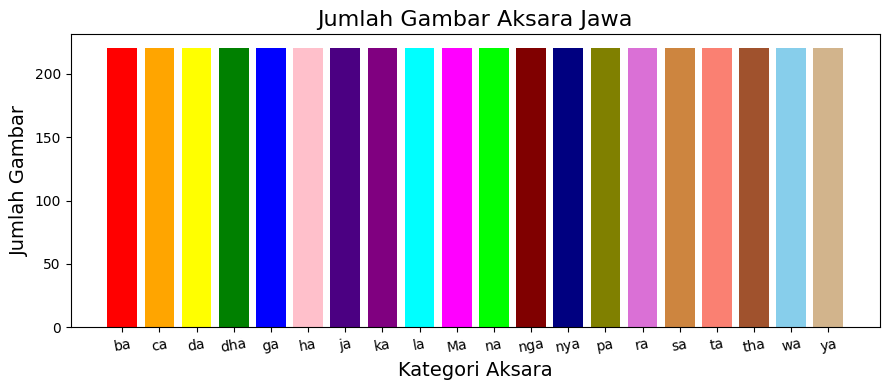

In [31]:
import matplotlib.pyplot as plt
import os

# Define function to count files in each directory
def count_files(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    return num_files

# Define paths for two sources
source_paths = [
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ba",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ca",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\da",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\dha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ga",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ja",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ka",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\la",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ma",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\na",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\nga",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\nya",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\pa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ra",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\sa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ta",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\tha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\wa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.1_all_data_custom\\ya"
]

# Count files for each path
file_counts = [count_files(path) for path in source_paths]

# Define the input path aksara
aksara_categories = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'Ma', 'na',
                     'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink', 'indigo', 'purple', 
          'cyan', 'magenta', 'lime', 'maroon', 'navy', 'olive', 'orchid', 'peru', 
          'salmon', 'sienna', 'skyblue', 'tan']  # Colors for each bar

# Create bar chart
plt.figure(figsize=(9, 4))
plt.bar(aksara_categories, file_counts, color=colors)
plt.xlabel('Kategori Aksara', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.title('Jumlah Gambar Aksara Jawa', fontsize=16)
plt.xticks(fontsize=10, rotation=10)
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the input path and aksaraJowo
INPUT_PATH = path_main  
AKSARA = aksara_categories

# Define the target image size
IMAGE_SIZE = (32, 32)
INPUT_SHAPE = (32, 32, 1)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Baca dan ubah warna asli
            original_image_resized = cv2.resize(original_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar asli
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            grayscale_image_resized = cv2.resize(grayscale_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
            image_filtered = apply_custom_preprocessing(grayscale_image_resized)
            
            yield original_image_resized, grayscale_image_resized, image_filtered, index


def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (9, 9), 10.0)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the image (background to black, text to white)
    img = 255 - img
    
    return img

# Load images with custom preprocessing applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)

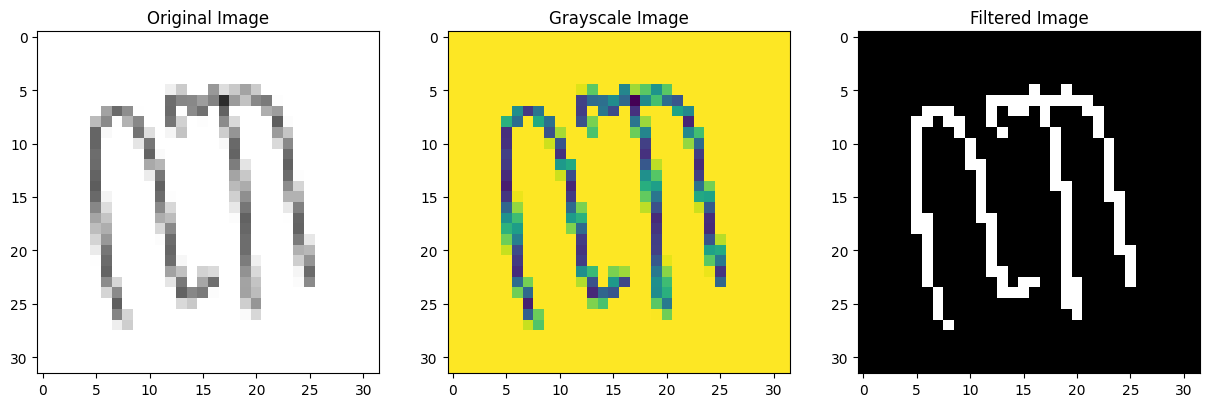

In [33]:
# Select one image to display
index_to_display = 100

# Display the original image, grayscale image, and filtered image
original_image = X_original[index_to_display]
grayscale_image = X_grayscale[index_to_display]
filtered_image = X_filtered[index_to_display]

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('on')

plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(grayscale_image)
plt.axis('on')

plt.subplot(1, 3, 3)
plt.title('Filtered Image')
# plt.imshow(filtered_image, cmap='gray')
plt.imshow(filtered_image, cmap='gray')
plt.axis('on')

plt.show()

In [34]:
# Reshape X_filtered
X_filtered_reshaped = X_filtered.reshape(-1, 32, 32, 1).astype("float32") / 255  # Reshape dan normalisasi
# X_filtered_reshaped = X_filtered.reshape(-1, 112, 112, 1)

print("X_filtered shape after reshape:", X_filtered_reshaped.shape)

X_filtered shape after reshape: (4400, 32, 32, 1)


In [35]:
from sklearn.model_selection import train_test_split

# Tahap pertama: Membagi data menjadi data pelatihan (80%) dan data sementara (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_filtered_reshaped, y_label, test_size=0.2, random_state=45)

# Tahap kedua: Membagi data sementara menjadi data validasi (10%) dan data pengujian (10%)
# Data sementara adalah 20% dari total data, jadi 10% / 20% = 0.5 dari data sementara untuk validasi
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=37)

# Verifikasi ukuran data
print("Ukuran data pelatihan:", X_train.shape, y_train.shape)
print("Ukuran data validasi:", X_val.shape, y_val.shape)
print("Ukuran data pengujian:", X_test.shape, y_test.shape)

Ukuran data pelatihan: (3520, 32, 32, 1) (3520, 20)
Ukuran data validasi: (440, 32, 32, 1) (440, 20)
Ukuran data pengujian: (440, 32, 32, 1) (440, 20)


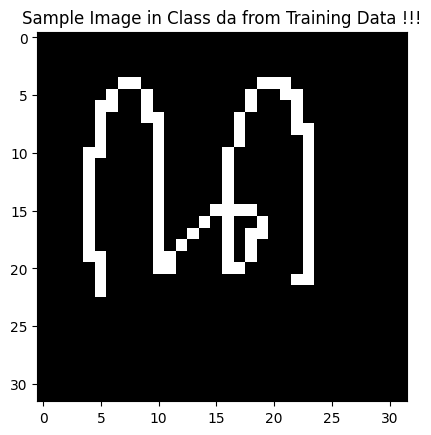

In [36]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_train[0], cmap='gray')
plt.title("Sample Image in Class {} from Training Data !!!".format(AKSARA[np.argmax(y_train[0])]))
plt.axis('on')
plt.show()

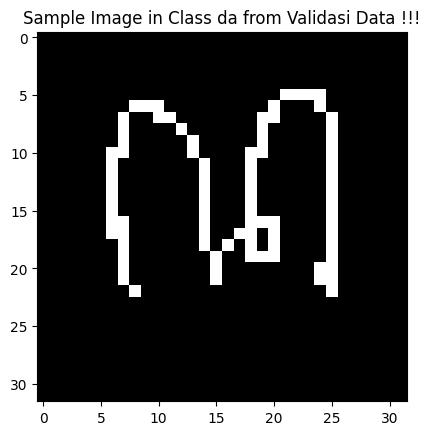

In [37]:
# Menampilkan salah satu gambar dari data validasi
plt.imshow(X_val[400], cmap='gray')
plt.title("Sample Image in Class {} from Validasi Data !!!".format(AKSARA[np.argmax(y_val[400])]))
plt.axis('on')
plt.show()

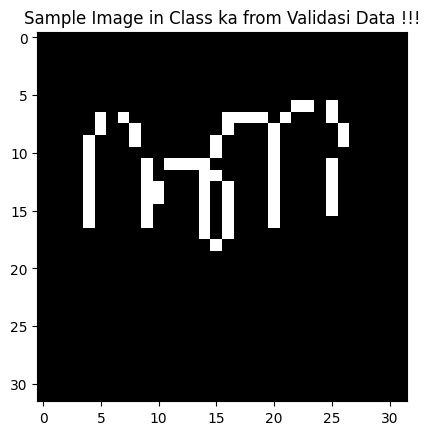

In [38]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_test[360], cmap='gray')
plt.title("Sample Image in Class {} from Validasi Data !!!".format(AKSARA[np.argmax(y_test[360])]))
plt.axis('on')
plt.show()

# Build the Model

## Model 1

In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import BatchNormalization

# Set hyperparameters
optimizer = 'SGD'
learning_rate = 0.0001
dropout_rate = 0.25
weight_decay = 0.0001
momentum = 0.9
clip_norm = 0.0
classes = 20
input_shape = INPUT_SHAPE

def inception_module(x, filters):
    f1, f3_r, f3, f5_r, f5, f_pool = filters

    path1 = layers.Conv2D(f1, (1, 1), padding='same')(x)
    path1 = BatchNormalization()(path1)
    path1 = layers.Activation('relu')(path1)

    path2 = layers.Conv2D(f3_r, (1, 1), padding='same')(x)
    path2 = BatchNormalization()(path2)
    path2 = layers.Activation('relu')(path2)
    path2 = layers.Conv2D(f3, (3, 3), padding='same')(path2)
    path2 = BatchNormalization()(path2)
    path2 = layers.Activation('relu')(path2)

    path3 = layers.Conv2D(f5_r, (1, 1), padding='same')(x)
    path3 = BatchNormalization()(path3)
    path3 = layers.Activation('relu')(path3)
    path3 = layers.Conv2D(f5, (5, 5), padding='same')(path3)
    path3 = BatchNormalization()(path3)
    path3 = layers.Activation('relu')(path3)

    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(f_pool, (1, 1), padding='same')(path4)
    path4 = BatchNormalization()(path4)
    path4 = layers.Activation('relu')(path4)

    return layers.concatenate([path1, path2, path3, path4], axis=-1)

def reduction_module(x, k, l, m, n):
    path1 = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    path2 = layers.Conv2D(n, (3, 3), strides=(2, 2), padding='same')(x)
    path2 = BatchNormalization()(path2)
    path2 = layers.Activation('relu')(path2)

    path3 = layers.Conv2D(k, (1, 1), padding='same')(x)
    path3 = BatchNormalization()(path3)
    path3 = layers.Activation('relu')(path3)
    path3 = layers.Conv2D(l, (3, 3), padding='same')(path3)
    path3 = BatchNormalization()(path3)
    path3 = layers.Activation('relu')(path3)
    path3 = layers.Conv2D(m, (3, 3), strides=(2, 2), padding='same')(path3)
    path3 = BatchNormalization()(path3)
    path3 = layers.Activation('relu')(path3)

    return layers.concatenate([path1, path2, path3], axis=-1)

def inception_v3(input_shape, classes, optimizer, learning_rate, dropout_rate, weight_decay, momentum, clip_norm):
    inputs = layers.Input(shape=input_shape)

    # Initial layers
    x = layers.Conv2D(32, (3, 3), strides=(2, 2), padding='valid')(inputs)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(32, (3, 3), padding='valid')(x)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    x = layers.Conv2D(80, (1, 1), padding='valid')(x)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(192, (3, 3), padding='valid')(x)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception modules
    x = inception_module(x, (64, 48, 64, 64, 96, 32))
    x = inception_module(x, (64, 48, 64, 64, 96, 64))
    x = inception_module(x, (64, 48, 64, 64, 96, 64))

    # Reduction module
    x = reduction_module(x, 64, 96, 96, 384)
    
    # Inception modules
    x = inception_module(x, (192, 128, 192, 128, 192, 192))
    x = inception_module(x, (192, 160, 192, 160, 192, 192))
    x = inception_module(x, (192, 160, 192, 160, 192, 192))
    x = inception_module(x, (192, 192, 192, 192, 192, 192))

    # Reduction module
    x = reduction_module(x, 192, 320, 320, 640)

    # Inception modules
    x = inception_module(x, (320, 384, 384, 448, 448, 192))
    x = inception_module(x, (320, 384, 384, 448, 448, 192))

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(classes, activation='softmax')(x)

    # Define optimizer with hyperparameters
    if optimizer == 'SGD':
        optimizer = optimizers.SGD(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, clipnorm=clip_norm)
    elif optimizer == 'Adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, clipnorm=clip_norm)
    elif optimizer == 'RMSprop':
        optimizer = optimizers.RMSprop(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, clipnorm=clip_norm)
    else:
        raise ValueError("Optimizer not supported. Choose from 'SGD', 'Adam', or 'RMSprop'.")

    model = models.Model(inputs, outputs)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build model
model = inception_v3(input_shape=input_shape, classes=classes, optimizer=optimizer, learning_rate=learning_rate, 
                     dropout_rate=dropout_rate, weight_decay=weight_decay, momentum=momentum, clip_norm=clip_norm)

model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_319 (Conv2D) │ (None, 15, 15,    │        320 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        128 │ conv2d_319[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_319      │ (None, 15, 15,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_320 (Conv2D) │ (None, 13, 13,    │      9,248 │ activation_319[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │        128 │ conv2d_320[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_320      │ (None, 13, 13,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_321 (Conv2D) │ (None, 13, 13,    │     18,496 │ activation_320[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │        256 │ conv2d_321[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_321      │ (None, 13, 13,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_63    │ (None, 7, 7, 64)  │          0 │ activation_321[0… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_322 (Conv2D) │ (None, 7, 7, 80)  │      5,200 │ max_pooling2d_63… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 80)  │        320 │ conv2d_322[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_322      │ (None, 7, 7, 80)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_323 (Conv2D) │ (None, 5, 5, 192) │    138,432 │ activation_322[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 5, 5, 192) │        768 │ conv2d_323[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_323      │ (None, 5, 5, 192) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 31,330,836 (119.52 MB)

 Trainable params: 31,306,068 (119.42 MB)

 Non-trainable params: 24,768 (96.75 KB)

In [44]:
import pandas as pd
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

# Callback for logging to CSV
class CSVLogger(Callback):
    def __init__(self, filename):
        super(CSVLogger, self).__init__()
        self.filename = filename
        self.epoch = 1  # Mulai dari epoch 1

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['epoch'] = self.epoch
        self.epoch += 1
        df = pd.DataFrame([logs])
        if epoch == 0:
            df.to_csv(self.filename, mode='w', index=False)
        else:
            df.to_csv(self.filename, mode='a', header=False, index=False)

In [45]:
# Function to get the last epoch from CSV
def get_last_epoch(filename):
    try:
        df = pd.read_csv(filename)
        last_epoch = df['epoch'].max()
        return last_epoch
    except FileNotFoundError:
        return 0

# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=55, min_lr=1e-4)

# Initialize callbacks
csv_logger = CSVLogger("C:\\Users\\wawn1\\projects_skripsi\\save_models\\training_log_v4.2.8_model1.csv")

In [46]:
# Train the model and save the logs to CSV
hist_v1 = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[
        reduce_lr,
        csv_logger
    ]
)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 491s 7s/step - accuracy: 0.0507 - loss: 3.4862 - val_accuracy: 0.0500 - val_loss: 3.0178 - learning_rate: 1.0000e-04 - epoch: 1.0000
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 352s 6s/step - accuracy: 0.0510 - loss: 3.3997 - val_accuracy: 0.0500 - val_loss: 3.0536 - learning_rate: 1.0000e-04 - epoch: 2.0000
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 376s 6s/step - accuracy: 0.0596 - loss: 3.3150 - val_accuracy: 0.0500 - val_loss: 3.0805 - learning_rate: 1.0000e-04 - epoch: 3.0000
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 328s 6s/step - accuracy: 0.0658 - loss: 3.2841 - val_accuracy: 0.0477 - val_loss: 3.0607 - learning_rate: 1.0000e-04 - epoch: 4.0000
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 363s 6s/step - accuracy: 0.0844 - loss: 3.2454 - val_accuracy: 0.0636 - val_loss: 3.0709 - learning_rate: 1.0000e-04 - epoch: 5.0000
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 333s 6s/step - accuracy: 0.1075 - loss: 3.0888 - val_accuracy: 0.0568 - val_loss: 3.1682 - learning_rate: 1

In [ ]:
# # Get the last epoch from CSV
# last_epoch = get_last_epoch("C:\\Users\\wawn1\\projects_skripsi\\save_models\\training_log_V4.2.6_model12.csv")

# # Train the model from the last epoch
# hist_v12 = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=5, 
#     initial_epoch=last_epoch, 
#     batch_size=64,
#     callbacks=[
#         reduce_lr,
#         csv_logger
#     ]
# )

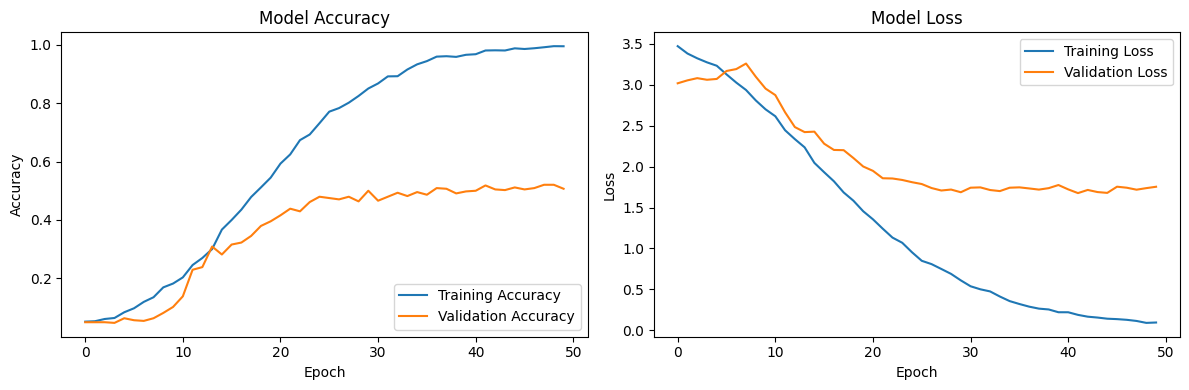

In [47]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = hist_v1.history.get('accuracy', [])
test_acc = hist_v1.history.get('val_accuracy', [])
loss = hist_v1.history.get('loss', [])
test_loss = hist_v1.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [49]:
from tensorflow.keras.models import load_model

save_model = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\v4.2.8_model1.keras"
model.save(save_model)

# Load model yang telah disimpan
new_model = load_model(save_model)

# Evaluate the restored model on the test set
test_loss, test_acc = new_model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.5460 - loss: 1.6031
Test Loss: 1.5822110176086426, Test Accuracy: 0.5545454621315002


In [57]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, average_precision_score, precision_recall_curve, cohen_kappa_score, top_k_accuracy_score
from itertools import cycle

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_probabilities = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax jika belum diterapkan di model
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred_probabilities)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
kappa = cohen_kappa_score(y_true_classes, y_pred_classes)
top_k_acc = top_k_accuracy_score(y_true_classes, y_pred_probabilities, k=5)
average_precision = np.mean([average_precision_score(y_test[:, i], y_pred_probabilities[:, i]) for i in range(len(AKSARA))])

# Print metrik evaluasi
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_value:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"Top-5 Accuracy: {top_k_acc:.4f}")
print(f"Mean Average Precision (mAP): {average_precision:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 253ms/step
Precision: 0.5723
Recall: 0.5545
F1 Score: 0.5545
Log Loss: 2.5769
Accuracy: 0.5545
Cohen's Kappa: 0.5308
Top-5 Accuracy: 0.8250
Mean Average Precision (mAP): 0.6163


              precision    recall  f1-score   support

          ba       0.62      0.44      0.52        18
          ca       0.34      0.48      0.40        23
          da       0.39      0.55      0.46        20
         dha       0.54      0.58      0.56        26
          ga       0.75      0.65      0.70        23
          ha       0.74      0.56      0.64        25
          ja       0.69      0.78      0.73        23
          ka       0.55      0.50      0.52        24
          la       0.58      0.52      0.55        27
          Ma       0.41      0.47      0.44        19
          na       0.54      0.37      0.44        19
         nga       0.73      0.46      0.56        24
         nya       0.72      0.76      0.74        17
          pa       0.24      0.38      0.29        13
          ra       0.81      0.96      0.88        23
          sa       0.50      0.44      0.47        27
          ta       0.41      0.58      0.48        19
         tha       0.64    

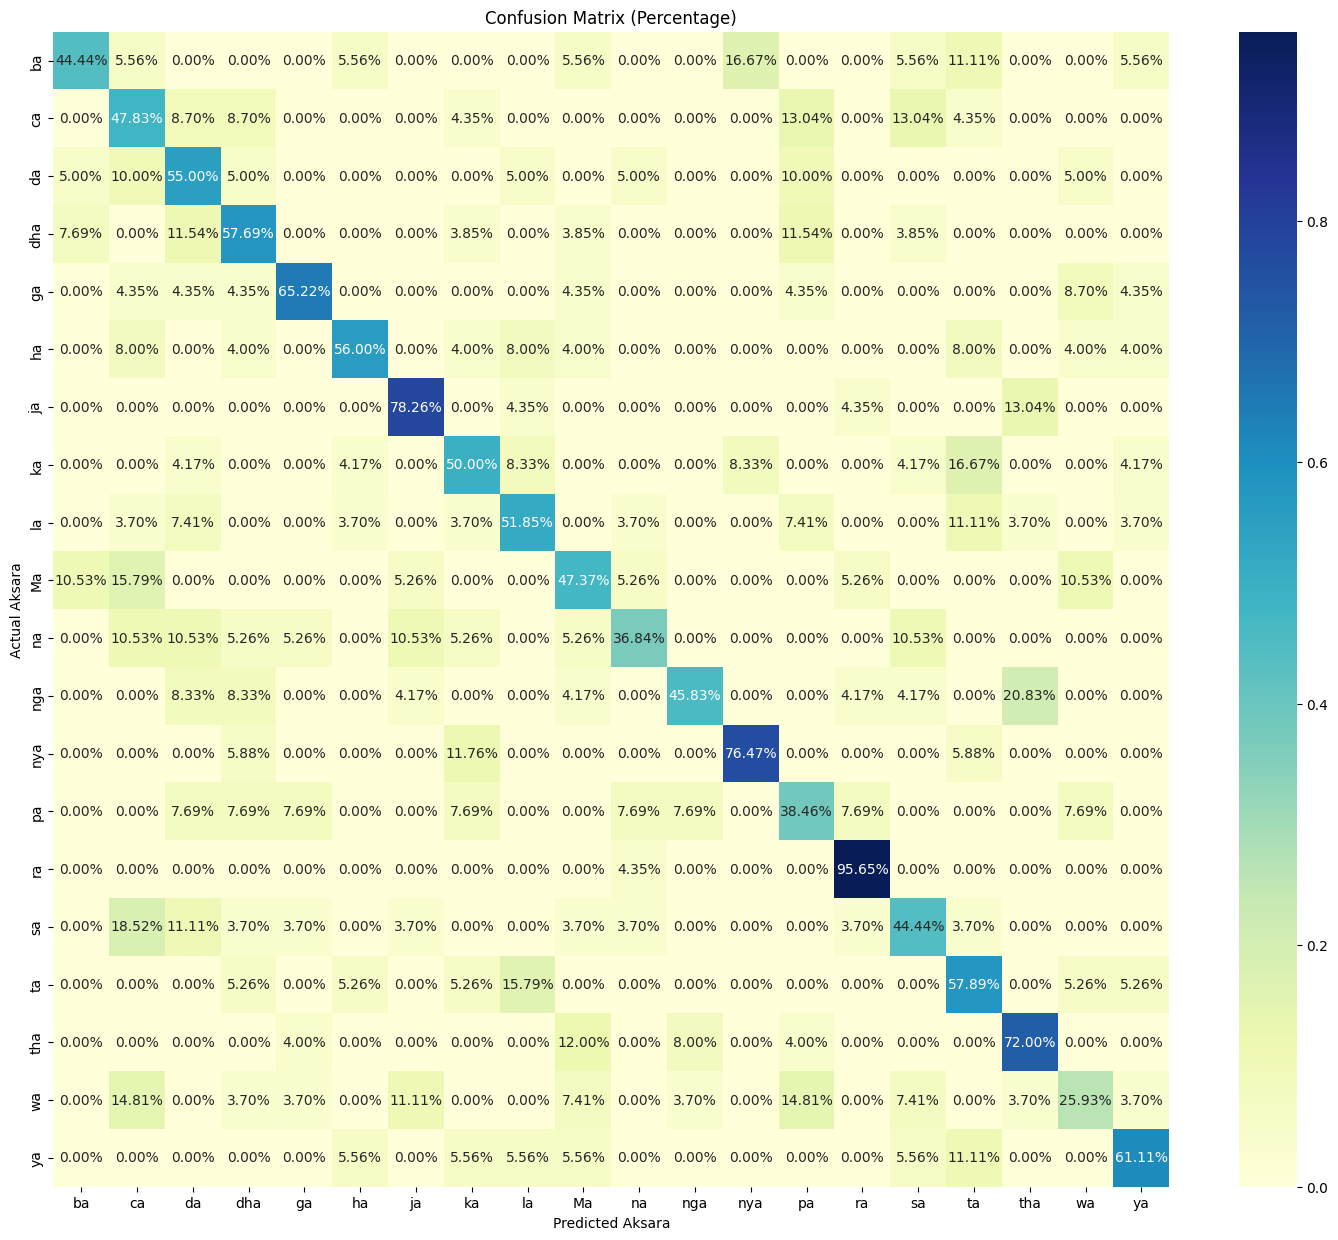

In [58]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Normalisasi confusion matrix untuk mendapatkan persentase
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Tampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

AUC-ROC for class ba: 0.8580
AUC-ROC for class ca: 0.8963
AUC-ROC for class da: 0.8443
AUC-ROC for class dha: 0.9335
AUC-ROC for class ga: 0.9514
AUC-ROC for class ha: 0.9270
AUC-ROC for class ja: 0.9332
AUC-ROC for class ka: 0.9225
AUC-ROC for class la: 0.9223
AUC-ROC for class Ma: 0.8890
AUC-ROC for class na: 0.8536
AUC-ROC for class nga: 0.9387
AUC-ROC for class nya: 0.9551
AUC-ROC for class pa: 0.9002
AUC-ROC for class ra: 0.9958
AUC-ROC for class sa: 0.9309
AUC-ROC for class ta: 0.8880
AUC-ROC for class tha: 0.9598
AUC-ROC for class wa: 0.8842
AUC-ROC for class ya: 0.9484


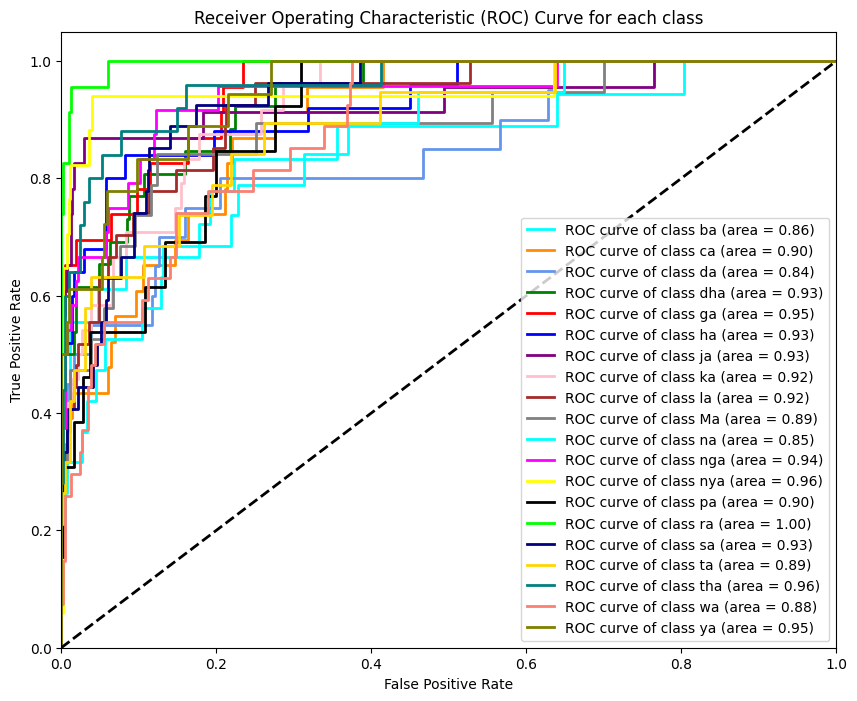

In [59]:
# Hitung AUC-ROC untuk setiap kelas
auc_roc_scores = roc_auc_score(y_test, y_pred_probabilities, average=None)
for idx, score in enumerate(auc_roc_scores):
    print(f"AUC-ROC for class {AKSARA[idx]}: {score:.4f}")

# Tampilkan ROC Curve untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(AKSARA)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'blue', 'purple', 'pink', 'brown', 'grey', 
                'cyan', 'magenta', 'yellow', 'black', 'lime', 'navy', 'gold', 'teal', 'salmon', 'olive'])

plt.figure(figsize=(10, 8))

for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_pred_probabilities[:, i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {AKSARA[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

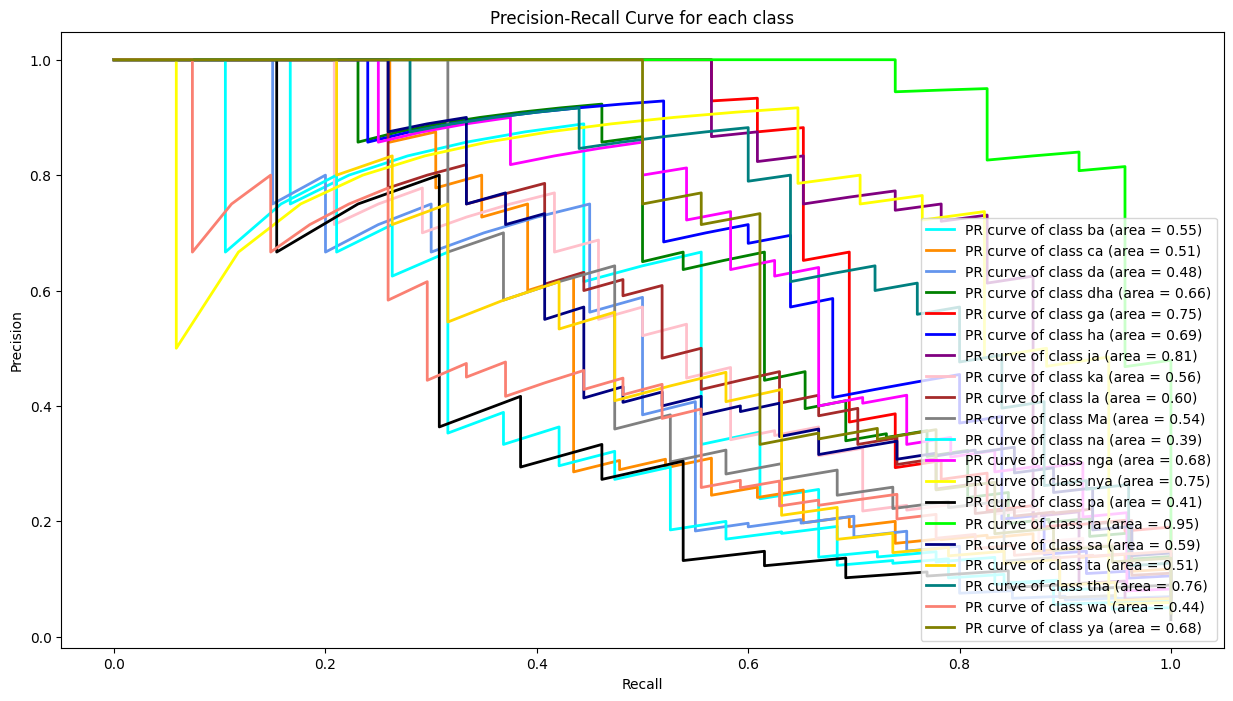

In [60]:
# Hitung AUPRC untuk setiap kelas
average_precision = dict()
precision_recall_curves = dict()

plt.figure(figsize=(15, 8))

for i, color in zip(range(n_classes), colors):
    precision_recall_curves[i], recall, _ = precision_recall_curve(y_test[:, i], y_pred_probabilities[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred_probabilities[:, i])
    plt.plot(recall, precision_recall_curves[i], color=color, lw=2, label=f'PR curve of class {AKSARA[i]} (area = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend(loc="lower right")
plt.show()